## 6장. 지지 벡터 머신

In [49]:
# 심볼릭 프로그래밍 - 미지의 변수 처리 (임의의 변수 생성?)
import sympy as sp
import numpy as np

x = np.array([[2,3],[4,1]])
y = np.array([1,-1])

print 'x : %s' % x
print 'y : %s' % y

a0, a1 = sp.symbols('a:2')

a_1 = np.array([a0, a1])
print 'a_1 : %s' % a_1

print 'a0 + a1 : %s' % (a0 + a1)

a0a0y0y0x0x0 = a0 * a0 * y[0] * y[0] * np.inner(x[0],x[0])
a0a1y0y1x0x1 = a0 * a1 * y[0] * y[1] * np.inner(x[0],x[1])
a1a0y1y0x1x0 = a1 * a0 * y[1] * y[0] * np.inner(x[1],x[0])
a1a1y1y1x1x1 = a1 * a1 * y[1] * y[1] * np.inner(x[1],x[1])

print 'a0a0y0y0x0x0 : %s' % a0a0y0y0x0x0
print 'a0a1y0y1x0x1 : %s' % a0a1y0y1x0x1
print 'a1a0y1y0x1x0 : %s' % a1a0y1y0x1x0
print 'a1a1y1y1x1x1 : %s' % a1a1y1y1x1x1

Ld = a0 + a1 - (a0a0y0y0x0x0 + a0a1y0y1x0x1 + a1a0y1y0x1x0 + a1a1y1y1x1x1)/2
print 'Ld : %s' % Ld

sumay = sum(a_1 * y)
print 'sumay : %s' % sumay

print 'sp.solve(sumay) : %s' % sp.solve(sumay)
print 'sp.solve(sumay, a0) : %s' % sp.solve(sumay, a0)

Ld_0 = Ld.subs(a0, a1)
print 'Ld_0 : %s' % Ld_0

print 'sp.solve(Ld_0, a1) : %s' % sp.solve(Ld_0, a1)

Ld_1 = sp.diff(Ld_0, a1)
print 'sp.solve(Ld_1) : %s' % sp.solve(Ld_1)


ayx = a_1 * y * x
print 'ayx : %s' % ayx

print 'ayx.sum(axis = 1) : %s' % ayx.sum(axis = 1)

sumayx = a0 * y[0] * x[0] + a1 * y[1] * x[1] # ayx.sum(axis = 1)
print 'sumayx : %s' % sumayx

sp.solve(sumayx, [a0, a1])
sp.solve(sumayx, a1)
# sumayx.subs(a0, a1)

x : [[2 3]
 [4 1]]
y : [ 1 -1]
a_1 : [a0 a1]
a0 + a1 : a0 + a1
a0a0y0y0x0x0 : 13*a0**2
a0a1y0y1x0x1 : -11*a0*a1
a1a0y1y0x1x0 : -11*a0*a1
a1a1y1y1x1x1 : 17*a1**2
Ld : -13*a0**2/2 + 11*a0*a1 + a0 - 17*a1**2/2 + a1
sumay : a0 - a1
sp.solve(sumay) : [{a0: a1}]
sp.solve(sumay, a0) : [a1]
Ld_0 : -4*a1**2 + 2*a1
sp.solve(Ld_0, a1) : [0, 1/2]
sp.solve(Ld_1) : [1/4]
ayx : [[2*a0 -3*a1]
 [4*a0 -a1]]
ayx.sum(axis = 1) : [2*a0 - 3*a1 4*a0 - a1]
sumayx : [2*a0 - 4*a1 3*a0 - a1]


[]

In [22]:
import numpy as np
import sympy as sp

x=np.array([[3,5],[2,3]])
y=np.array([1,-1])

a0,a1=sp.symbols('a:2')
a=np.array([a0,a1])
b=sp.symbols('b')

In [23]:
def KernelLinear(xi,xj):
    import numpy as np
    return np.inner(xi,xj)

K=KernelLinear(x,x)
print "Kernel={0}".format(K)


Kernel=[[34 21]
 [21 13]]


In [24]:
def getLd(a,y,x,xi):
    Ld1=sum(a) -0.5*sumaayyk(a,y,x,xi)
    return Ld1

def sumaayyk(a,y,x,xi):
    import numpy as np
    _sumaayyk=np.array(sum(np.outer(a,a)*np.outer(y,y)*KernelLinear(x,xi)))
    return sum(_sumaayyk)

Ld1=sum(a) -0.5*sumaayyk(a,y,x,x)
print "Ld1={0}".format(Ld1)

Ld1=-17.0*a0**2 + 21.0*a0*a1 + a0 - 6.5*a1**2 + a1


In [25]:
# 위의 outer 연산은 모든 컴비네이션을 만들어 준다.
print np.outer(a,a)

[[a0**2 a0*a1]
 [a0*a1 a1**2]]


* $\sum \alpha y = 0$

In [26]:
# Ld에 대입하고 -> 미분해서 -> 0으로 놓고 해를 구한다.
print "sum of ai*yi=0 --> ",sum(a*y)

sum of ai*yi=0 -->  a0 - a1


In [27]:
Ld1_=Ld1.subs(a0,a1)
print "Ld1_a0=a1 = ",Ld1_

Ld1_a0=a1 =  -2.5*a1**2 + 2*a1


In [28]:
Ld2=sp.diff(Ld1_,a1)
print "Ld2={0}".format(Ld2)
a_1=sp.solve(Ld2,a1)[0]
# a_1=a_[0]
print a_1

Ld2=-5.0*a1 + 2
0.400000000000000


In [29]:
sol_a=[a_1,a_1]
print sol_a

[0.400000000000000, 0.400000000000000]


* $w=\sum_{i=0}^N \alpha yx$

In [30]:
def sumayx(alphas,y,x):
    ayxT=alphas*y*x.T
    return ayxT.sum(axis=1)

sol_w=sumayx(np.array(sol_a),y,x)
sumayx(np.array(sol_a),y,x)
print sol_w

[0.400000000000000 0.800000000000000]


$$
    \begin{aligned}
        \sum wx+b &=1 or -1\\
        y(\sum wx+b) &=1\\
        yb &=1-y\sum wx\\
        b &= y(1-y\sum wx)
    \end{aligned}
$$

In [31]:
for xi,yi in zip(x,y):
    b=yi*(1-yi*np.inner(sol_w,xi))
    print b,xi,yi

-4.20000000000000 [3 5] 1
-4.20000000000000 [2 3] -1


* decision line을 구하면

$w0×x0+w1×x1+b=0w0×x0+w1×x1+b=0$<br>
$x1=\frac{−(w0×x0+b)}{w1}$

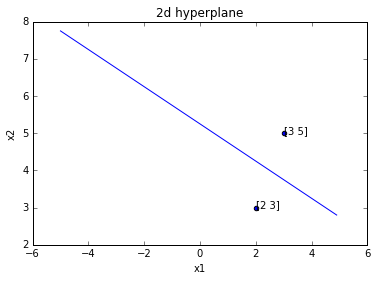

In [32]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

x1=np.arange(-5,5,0.1)
x2=-(sol_w[0]*x1+b)/sol_w[1]

fig=plt.figure()
ax = fig.add_subplot(111)
ax.set_title('2d hyperplane')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
for i in x:
    ax.text(i[0],i[1],i)
    plt.scatter(i[0],i[1])
plt.plot(x1,x2)
#plt.scatter([0,4],[0,4])
plt.show()

In [1]:
from numpy import *
from time import sleep

# 도움 함수 #1
def loadDataSet(fileName):
    dataMat = []; labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = line.strip().split('\t')
        dataMat.append([float(lineArr[0]), float(lineArr[1])])
        labelMat.append(float(lineArr[2]))
    return dataMat, labelMat

In [13]:
dataArr, labelArr = loadDataSet('python_week08/testSet.txt')
print labelArr

[-1.0, -1.0, 1.0, -1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0]


In [5]:
# 도움 함수 #2
"""
i는 첫 번째 알파의 색인; m은 알파 전체의 개수
임의로 선택된 하나의 값은 i와 동일하지 않을 때까지 반복하여 선택한 값으로 반환
"""
def selectJrand(i,m): 
    j=i #we want to select any J not equal to i
    while (j==i):
        j = int(random.uniform(0,m))
    return j


# 도움 함수 #3
"""
알파 값이 H보다 크거나 L보다 작은 값일 경우 더 크거나 더 작아지지 않도록 고정시킴

"""
def clipAlpha(aj,H,L): # 도움 함수 #2
    if aj > H: 
        aj = H
    if L > aj:
        aj = L
    return aj

## SMO 함수

In [6]:
# 이 함수는 5개 인자 (데이터 집합, 분류 항목 표시, 상수 C, 오차 범위, 종료하기 전 최대 반복 횟수) 처리
def smoSimple(dataMatIn, classLabels, C, toler, maxIter):
    dataMatrix = mat(dataMatIn); labelMat = mat(classLabels).transpose()
    b = 0; m,n = shape(dataMatrix)
    alphas = mat(zeros((m,1)))
    iter = 0
    # 1. 알파가 변경될 수 있다면 최적화 입력
    while (iter < maxIter):
        alphaPairsChanged = 0
        for i in range(m):
            fXi = float(multiply(alphas,labelMat).T*(dataMatrix*dataMatrix[i,:].T)) + b
            Ei = fXi - float(labelMat[i])#if checks if an example violates KKT conditions
            if ((labelMat[i]*Ei < -toler) and (alphas[i] < C)) or ((labelMat[i]*Ei > toler) and (alphas[i] > 0)):
                # 2. 임의로 두 번째 알파 선택
                j = selectJrand(i,m)
                fXj = float(multiply(alphas,labelMat).T*(dataMatrix*dataMatrix[j,:].T)) + b
                Ej = fXj - float(labelMat[j])
                alphaIold = alphas[i].copy(); alphaJold = alphas[j].copy();
                # 3. 알파가 0과 C 사이의 값이 되도록 함
                if (labelMat[i] != labelMat[j]):
                    L = max(0, alphas[j] - alphas[i])
                    H = min(C, C + alphas[j] - alphas[i])
                else:
                    L = max(0, alphas[j] + alphas[i] - C)
                    H = min(C, alphas[j] + alphas[i])
                if L==H: print "L==H"; continue
                eta = 2.0 * dataMatrix[i,:]*dataMatrix[j,:].T - dataMatrix[i,:]*dataMatrix[i,:].T - dataMatrix[j,:]*dataMatrix[j,:].T
                if eta >= 0: print "eta>=0"; continue
                alphas[j] -= labelMat[j]*(Ei - Ej)/eta
                alphas[j] = clipAlpha(alphas[j],H,L)
                # 4. 반대쪽에 있는 j와 동일하게 계산된 값으로 i를 갱신
                if (abs(alphas[j] - alphaJold) < 0.00001): print "j not moving enough"; continue
                alphas[i] += labelMat[j]*labelMat[i]*(alphaJold - alphas[j])#update i by the same amount as j
                                                                        #the update is in the oppostie direction
                b1 = b - Ei- labelMat[i]*(alphas[i]-alphaIold)*dataMatrix[i,:]*dataMatrix[i,:].T - labelMat[j]*(alphas[j]-alphaJold)*dataMatrix[i,:]*dataMatrix[j,:].T
                # 5. 상수의 간격을 설정
                b2 = b - Ej- labelMat[i]*(alphas[i]-alphaIold)*dataMatrix[i,:]*dataMatrix[j,:].T - labelMat[j]*(alphas[j]-alphaJold)*dataMatrix[j,:]*dataMatrix[j,:].T
                if (0 < alphas[i]) and (C > alphas[i]): b = b1
                elif (0 < alphas[j]) and (C > alphas[j]): b = b2
                else: b = (b1 + b2)/2.0
                alphaPairsChanged += 1
                print "iter: %d i:%d, pairs changed %d" % (iter,i,alphaPairsChanged)
        if (alphaPairsChanged == 0): iter += 1
        else: iter = 0
        print "iteration number: %d" % iter
    return b,alphas

In [7]:
b, alphas = smoSimple(dataArr, labelArr, 0.6, 0.001, 40)

iter: 0 i:0, pairs changed 1
iter: 0 i:2, pairs changed 2
j not moving enough
L==H
j not moving enough
L==H
L==H
j not moving enough
j not moving enough
L==H
L==H
j not moving enough
L==H
iter: 0 i:36, pairs changed 3
L==H
j not moving enough
iter: 0 i:46, pairs changed 4
j not moving enough
L==H
j not moving enough
L==H
j not moving enough
iteration number: 0
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iter: 0 i:47, pairs changed 1
j not moving enough
L==H
j not moving enough
L==H
iter: 0 i:69, pairs changed 2
L==H
L==H
L==H
L==H
L==H
j not moving enough
L==H
L==H
L==H
L==H
iter: 0 i:96, pairs changed 3
j not moving enough
iteration number: 0
j not moving enough
j not moving enough
L==H
iter: 0 i:10, pairs changed 1
j not moving enough
j not moving enough
j not moving enough
L==H
iter: 0 i:36, pairs changed 2
iter: 0 i:39, pairs changed 3
iter: 0 i:46, pairs changed 4
L==H
iter: 0 i:54, pairs changed 5
iter: 0 i:55, pairs changed 6
j not moving enou

In [11]:
b

matrix([[-3.85992741]])

In [12]:
alphas[alphas>0]

matrix([[ 0.12406178,  0.24571036,  0.36977214]])

In [9]:
shape(alphas[alphas>0])

(1L, 3L)

## 6.6 예제: 필기체 인식 예제 다시 적용하기

In [16]:
def smoP(dataMatIn, classLabels, C, toler, maxIter,kTup=('lin', 0)):    #full Platt SMO
    oS = optStruct(mat(dataMatIn),mat(classLabels).transpose(),C,toler, kTup)
    iter = 0
    entireSet = True; alphaPairsChanged = 0
    while (iter < maxIter) and ((alphaPairsChanged > 0) or (entireSet)):
        alphaPairsChanged = 0
        if entireSet:   #go over all
            for i in range(oS.m):        
                alphaPairsChanged += innerL(i,oS)
                print "fullSet, iter: %d i:%d, pairs changed %d" % (iter,i,alphaPairsChanged)
            iter += 1
        else:#go over non-bound (railed) alphas
            nonBoundIs = nonzero((oS.alphas.A > 0) * (oS.alphas.A < C))[0]
            for i in nonBoundIs:
                alphaPairsChanged += innerL(i,oS)
                print "non-bound, iter: %d i:%d, pairs changed %d" % (iter,i,alphaPairsChanged)
            iter += 1
        if entireSet: entireSet = False #toggle entire set loop
        elif (alphaPairsChanged == 0): entireSet = True  
        print "iteration number: %d" % iter
    return oS.b,oS.alphas

In [19]:
class optStruct:
    def __init__(self,dataMatIn, classLabels, C, toler, kTup):  # Initialize the structure with the parameters 
        self.X = dataMatIn
        self.labelMat = classLabels
        self.C = C
        self.tol = toler
        self.m = shape(dataMatIn)[0]
        self.alphas = mat(zeros((self.m,1)))
        self.b = 0
        self.eCache = mat(zeros((self.m,2))) #first column is valid flag
        self.K = mat(zeros((self.m,self.m)))
        for i in range(self.m):
            self.K[:,i] = kernelTrans(self.X, self.X[i,:], kTup)

In [22]:
def kernelTrans(X, A, kTup): #calc the kernel or transform data to a higher dimensional space
    m,n = shape(X)
    K = mat(zeros((m,1)))
    if kTup[0]=='lin': K = X * A.T   #linear kernel
    elif kTup[0]=='rbf':
        for j in range(m):
            deltaRow = X[j,:] - A
            K[j] = deltaRow*deltaRow.T
        K = exp(K/(-1*kTup[1]**2)) #divide in NumPy is element-wise not matrix like Matlab
    else: raise NameError('Houston We Have a Problem -- \
    That Kernel is not recognized')
    return K

In [24]:
def innerL(i, oS):
    Ei = calcEk(oS, i)
    if ((oS.labelMat[i]*Ei < -oS.tol) and (oS.alphas[i] < oS.C)) or ((oS.labelMat[i]*Ei > oS.tol) and (oS.alphas[i] > 0)):
        j,Ej = selectJ(i, oS, Ei) #this has been changed from selectJrand
        alphaIold = oS.alphas[i].copy(); alphaJold = oS.alphas[j].copy();
        if (oS.labelMat[i] != oS.labelMat[j]):
            L = max(0, oS.alphas[j] - oS.alphas[i])
            H = min(oS.C, oS.C + oS.alphas[j] - oS.alphas[i])
        else:
            L = max(0, oS.alphas[j] + oS.alphas[i] - oS.C)
            H = min(oS.C, oS.alphas[j] + oS.alphas[i])
        if L==H: print "L==H"; return 0
        eta = 2.0 * oS.K[i,j] - oS.K[i,i] - oS.K[j,j] #changed for kernel
        if eta >= 0: print "eta>=0"; return 0
        oS.alphas[j] -= oS.labelMat[j]*(Ei - Ej)/eta
        oS.alphas[j] = clipAlpha(oS.alphas[j],H,L)
        updateEk(oS, j) #added this for the Ecache
        if (abs(oS.alphas[j] - alphaJold) < 0.00001): print "j not moving enough"; return 0
        oS.alphas[i] += oS.labelMat[j]*oS.labelMat[i]*(alphaJold - oS.alphas[j])#update i by the same amount as j
        updateEk(oS, i) #added this for the Ecache                    #the update is in the oppostie direction
        b1 = oS.b - Ei- oS.labelMat[i]*(oS.alphas[i]-alphaIold)*oS.K[i,i] - oS.labelMat[j]*(oS.alphas[j]-alphaJold)*oS.K[i,j]
        b2 = oS.b - Ej- oS.labelMat[i]*(oS.alphas[i]-alphaIold)*oS.K[i,j]- oS.labelMat[j]*(oS.alphas[j]-alphaJold)*oS.K[j,j]
        if (0 < oS.alphas[i]) and (oS.C > oS.alphas[i]): oS.b = b1
        elif (0 < oS.alphas[j]) and (oS.C > oS.alphas[j]): oS.b = b2
        else: oS.b = (b1 + b2)/2.0
        return 1
    else: return 0

In [26]:
def calcEk(oS, k):
    fXk = float(multiply(oS.alphas,oS.labelMat).T*oS.K[:,k] + oS.b)
    Ek = fXk - float(oS.labelMat[k])
    return Ek


In [30]:
def selectJ(i, oS, Ei):         #this is the second choice -heurstic, and calcs Ej
    maxK = -1; maxDeltaE = 0; Ej = 0
    oS.eCache[i] = [1,Ei]  #set valid #choose the alpha that gives the maximum delta E
    validEcacheList = nonzero(oS.eCache[:,0].A)[0]
    if (len(validEcacheList)) > 1:
        for k in validEcacheList:   #loop through valid Ecache values and find the one that maximizes delta E
            if k == i: continue #don't calc for i, waste of time
            Ek = calcEk(oS, k)
            deltaE = abs(Ei - Ek)
            if (deltaE > maxDeltaE):
                maxK = k; maxDeltaE = deltaE; Ej = Ek
        return maxK, Ej
    else:   #in this case (first time around) we don't have any valid eCache values
        j = selectJrand(i, oS.m)
        Ej = calcEk(oS, j)
    return j, Ej

In [32]:
def updateEk(oS, k):#after any alpha has changed update the new value in the cache
    Ek = calcEk(oS, k)
    oS.eCache[k] = [1,Ek]

In [20]:
def loadImages(dirName):
    from os import listdir
    hwLabels = []
    trainingFileList = listdir(dirName)           #load the training set
    m = len(trainingFileList)
    trainingMat = zeros((m,1024))
    for i in range(m):
        fileNameStr = trainingFileList[i]
        fileStr = fileNameStr.split('.')[0]     #take off .txt
        classNumStr = int(fileStr.split('_')[0])
        if classNumStr == 9: hwLabels.append(-1)
        else: hwLabels.append(1)
        trainingMat[i,:] = img2vector('%s/%s' % (dirName, fileNameStr))
    return trainingMat, hwLabels    

def testDigits(kTup=('rbf', 10)):
    dataArr,labelArr = loadImages('python_week08/digits/trainingDigits')
    b,alphas = smoP(dataArr, labelArr, 200, 0.0001, 10000, kTup)
    datMat=mat(dataArr); labelMat = mat(labelArr).transpose()
    svInd=nonzero(alphas.A>0)[0]
    sVs=datMat[svInd] 
    labelSV = labelMat[svInd];
    print "there are %d Support Vectors" % shape(sVs)[0]
    m,n = shape(datMat)
    errorCount = 0
    for i in range(m):
        kernelEval = kernelTrans(sVs,datMat[i,:],kTup)
        predict=kernelEval.T * multiply(labelSV,alphas[svInd]) + b
        if sign(predict)!=sign(labelArr[i]): errorCount += 1
    print "the training error rate is: %f" % (float(errorCount)/m)
    dataArr,labelArr = loadImages('python_week08/digits/testDigits')
    errorCount = 0
    datMat=mat(dataArr); labelMat = mat(labelArr).transpose()
    m,n = shape(datMat)
    for i in range(m):
        kernelEval = kernelTrans(sVs,datMat[i,:],kTup)
        predict=kernelEval.T * multiply(labelSV,alphas[svInd]) + b
        if sign(predict)!=sign(labelArr[i]): errorCount += 1    
    print "the test error rate is: %f" % (float(errorCount)/m) 
    
def img2vector(filename):
    returnVect = zeros((1,1024))
    fr = open(filename)
    for i in range(32):
        lineStr = fr.readline()
        for j in range(32):
            returnVect[0,32*i+j] = int(lineStr[j])
    return returnVect

In [33]:
testDigits(('rbf',20))

fullSet, iter: 0 i:0, pairs changed 1
fullSet, iter: 0 i:1, pairs changed 2
fullSet, iter: 0 i:2, pairs changed 3
fullSet, iter: 0 i:3, pairs changed 4
fullSet, iter: 0 i:4, pairs changed 5
fullSet, iter: 0 i:5, pairs changed 6
fullSet, iter: 0 i:6, pairs changed 6
fullSet, iter: 0 i:7, pairs changed 7
fullSet, iter: 0 i:8, pairs changed 8
fullSet, iter: 0 i:9, pairs changed 9
fullSet, iter: 0 i:10, pairs changed 9
fullSet, iter: 0 i:11, pairs changed 9
fullSet, iter: 0 i:12, pairs changed 10
fullSet, iter: 0 i:13, pairs changed 11
fullSet, iter: 0 i:14, pairs changed 12
fullSet, iter: 0 i:15, pairs changed 12
fullSet, iter: 0 i:16, pairs changed 12
fullSet, iter: 0 i:17, pairs changed 12
fullSet, iter: 0 i:18, pairs changed 12
fullSet, iter: 0 i:19, pairs changed 12
fullSet, iter: 0 i:20, pairs changed 12
fullSet, iter: 0 i:21, pairs changed 12
fullSet, iter: 0 i:22, pairs changed 12
fullSet, iter: 0 i:23, pairs changed 12
fullSet, iter: 0 i:24, pairs changed 12
fullSet, iter: 0 i:25,

## 선형 문제 풀기 : CVX 방식으로

In [39]:
import cvxopt as cvx

c = cvx.matrix([2.0,1.0])
A = cvx.matrix([ [-1.0, -1.0, 0.0, 1.0], [1.0, -1.0, -1.0, -2.0] ])
b = cvx.matrix([1.0, -2.0, 0.0, 4.0])

sol = cvx.solvers.lp(c,A,b)
print sol
print sol['x']

     pcost       dcost       gap    pres   dres   k/t
 0:  2.6471e+00 -7.0588e-01  2e+01  8e-01  2e+00  1e+00
 1:  3.0726e+00  2.8437e+00  1e+00  1e-01  2e-01  3e-01
 2:  2.4891e+00  2.4808e+00  1e-01  1e-02  2e-02  5e-02
 3:  2.4999e+00  2.4998e+00  1e-03  1e-04  2e-04  5e-04
 4:  2.5000e+00  2.5000e+00  1e-05  1e-06  2e-06  5e-06
 5:  2.5000e+00  2.5000e+00  1e-07  1e-08  2e-08  5e-08
Optimal solution found.
{'status': 'optimal', 'dual slack': 3.5299159724767014e-09, 'iterations': 5, 'residual as primal infeasibility certificate': None, 'relative gap': 5.589978335731334e-08, 'dual objective': 2.499999981731253, 'residual as dual infeasibility certificate': None, 'gap': 1.3974945737206436e-07, 's': <4x1 matrix, tc='d'>, 'primal infeasibility': 1.136878618915229e-08, 'dual infeasibility': 2.2578789695045126e-08, 'primal objective': 2.4999999895543077, 'primal slack': 2.038839954671028e-08, 'y': <0x1 matrix, tc='d'>, 'x': <2x1 matrix, tc='d'>, 'z': <4x1 matrix, tc='d'>}
[ 5.00e-01]
[ 1.

In [65]:
import numpy as np

_x = np.array([ [2,3],[4,1]] ,dtype=float)
_y = np.array([1,-1])

print _x
print _y

F = np.inner(_x,_x)
yy = np.outer(_y,_y)

P = cvx.matrix(F*yy)

_m,_n = _x.shape

q = cvx.matrix(np.ones(_m)*-1)

A = cvx.matrix(_y.reshape(1,_m).astype(float))

b = cvx.matrix(0.0)

G = cvx.matrix(np.diag(np.diag(np.ones((_m,_m)))*-1))

h = cvx.matrix(np.zeros(_m).reshape(_m,1))

sol = cvx.solvers.qp(P,q,G,h,A,b)

print sol
print sol['x']




[[ 2.  3.]
 [ 4.  1.]]
[ 1 -1]
     pcost       dcost       gap    pres   dres
 0: -2.4000e-01 -6.4000e-01  4e-01  3e-17  1e+00
 1: -2.4894e-01 -2.5361e-01  5e-03  3e-17  8e-02
 2: -2.5000e-01 -2.5005e-01  5e-05  6e-17  5e-04
 3: -2.5000e-01 -2.5000e-01  5e-07  3e-17  5e-06
 4: -2.5000e-01 -2.5000e-01  5e-09  6e-17  5e-08
Optimal solution found.
{'status': 'optimal', 'dual slack': 1.000000000000026e-08, 'iterations': 4, 'relative gap': 1.9999999291729714e-08, 'dual objective': -0.25000000499999964, 'gap': 4.9999998229324245e-09, 'primal objective': -0.2499999999999998, 'primal slack': 0.24999999114661198, 's': <2x1 matrix, tc='d'>, 'primal infeasibility': 5.551115123125783e-17, 'dual infeasibility': 4.541355253489124e-08, 'y': <1x1 matrix, tc='d'>, 'x': <2x1 matrix, tc='d'>, 'z': <2x1 matrix, tc='d'>}
[ 2.50e-01]
[ 2.50e-01]

